In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
from colorama import Fore
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [243]:
arima_training_results = pd.read_csv('validation/ARIMA_validation.csv')
arima_testing_results = pd.read_csv('testing/ARIMA_testing.csv')

In [245]:
erma_training_results = pd.read_csv('training/EWMA_training.csv')
erma_testing_results = pd.read_csv('testing/EWMA_testing.csv')

In [247]:
macd_training_results = pd.read_csv('training/MACD_training.csv')
macd_testing_results = pd.read_csv('testing/MACD_testing.csv')

In [349]:
def calculate_cumturnover(data, strategy_name):
    cum_over_theta = sum(data["turn_over_theta"])
    cum_over_units = sum(data["turn_over_units"])
    print(Fore.GREEN + f"Cumulative Turnover for {strategy_name} Theta: ", cum_over_theta)
    print(Fore.GREEN + f"Cumulative Turnover for {strategy_name} Units: ", cum_over_units)

calculate_cumturnover(arima_training_results, "ARIMA Training")
calculate_cumturnover(arima_testing_results, "ARIMA Testing")

calculate_cumturnover(erma_training_results, "EWMA Training")
calculate_cumturnover(erma_testing_results, "EWMA Testing")

calculate_cumturnover(macd_training_results, "MACD Training")
calculate_cumturnover(macd_testing_results, "MACD Testing")

Cumulative Turnover for ARIMA Training Theta:  785078059.5620084
Cumulative Turnover for ARIMA Training Units:  21350053.43047572
Cumulative Turnover for ARIMA Testing Theta:  1281154341.8603234
Cumulative Turnover for ARIMA Testing Units:  35453726.90970414
Cumulative Turnover for EWMA Training Theta:  52204520.43422966
Cumulative Turnover for EWMA Training Units:  1168634.7917017203
Cumulative Turnover for EWMA Testing Theta:  18811235.986858204
Cumulative Turnover for EWMA Testing Units:  491838.95567289024
Cumulative Turnover for MACD Training Theta:  105342730.117789
Cumulative Turnover for MACD Training Units:  3037793.82818454
Cumulative Turnover for MACD Testing Theta:  205693034.33908796
Cumulative Turnover for MACD Testing Units:  5416424.469560437


In [ ]:
def calculate_drawdown(pnl_array):
    drawdowns = []
    current_max = float("-inf")
    for pnl in pnl_array:
        current_max = max(current_max, pnl)
        drawdown = (current_max - pnl) 
        drawdowns.append(drawdown)
    return drawdowns

In [295]:
# historic rolling 90-day volatility
arima_training_results_rolling = arima_training_results['Close'].rolling(window=90).std()
arima_testing_results_rolling = arima_testing_results['Close'].rolling(window=90).std()

erma_training_results_rolling = erma_training_results['Close'].rolling(window=90).std()
erma_testing_results_rolling = erma_testing_results['Close'].rolling(window=90).std()

macd_training_results_rolling = macd_training_results['Close'].rolling(window=90).std()
macd_testing_results_rolling = macd_testing_results['Close'].rolling(window=90).std()

In [311]:
DD_testing_arima = calculate_drawdown(arima_testing_results['pnl'])
DD_training_arima = calculate_drawdown(arima_training_results['pnl'])

DD_testing_erma = calculate_drawdown(erma_testing_results['pnl'])
DD_training_erma = calculate_drawdown(erma_training_results['pnl'])

DD_testing_macd = calculate_drawdown(macd_testing_results['pnl'])
DD_training_macd = calculate_drawdown(macd_training_results['pnl'])

In [333]:
fig = make_subplots(rows=4, cols=1)

fig.add_trace(go.Scatter(x=macd_training_results['Date'], y=DD_training_macd, name='MACD Drawdown (Training)', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=macd_training_results['Date'], y=macd_training_results_rolling, name='90-Day Volatility (Training)', line=dict(color='blue'), showlegend=False), row=2, col=1)

fig.add_trace(go.Scatter(x=macd_testing_results['Date'], y=DD_testing_macd, name='MACD Drawdown (Testing)', line=dict(color='red')), row=3, col=1)
fig.add_trace(go.Scatter(x=macd_testing_results['Date'], y=macd_testing_results_rolling, name='90-Day Volatility (Testing)', line=dict(color='red'), showlegend=False), row=4, col=1)

fig.update_xaxes(title_text="Date", row=4, col=1)

fig.show()

In [332]:
fig = make_subplots(rows=4, cols=1)

fig.add_trace(go.Scatter(x=erma_training_results['Date'], y=DD_training_erma, name='EWMA Drawdown (Training)', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=erma_training_results['Date'], y=erma_training_results_rolling, name='90-Day Volatility (Training)', line=dict(color='blue')), row=2, col=1)

fig.add_trace(go.Scatter(x=erma_testing_results['Date'], y=DD_testing_erma, name='EWMA Drawdown (Testing)', line=dict(color='red')), row=3, col=1)
fig.add_trace(go.Scatter(x=erma_testing_results['Date'], y=erma_testing_results_rolling, name='90-Day Volatility (Testing)', line=dict(color='red')), row=4, col=1)

fig.update_xaxes(title_text="Date", row=4, col=1)

fig.show()

In [334]:
fig = make_subplots(rows=4, cols=1)

fig.add_trace(go.Scatter(x=arima_training_results['Date'], y=DD_training_arima, name='ARIMA Drawdown (Training)', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=arima_training_results['Date'], y=arima_training_results_rolling, name='90-Day Volatility (Training)', line=dict(color='blue')), row=2, col=1)

fig.add_trace(go.Scatter(x=arima_testing_results['Date'], y=DD_testing_arima, name='ARIMA Drawdown (Testing)', line=dict(color='red')), row=3, col=1)
fig.add_trace(go.Scatter(x=arima_testing_results['Date'], y=arima_testing_results_rolling, name='90-Day Volatility (Testing)', line=dict(color='red')), row=4, col=1)

fig.update_xaxes(title_text="Date", row=4, col=1)

fig.show()

In [317]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(x=arima_training_results['Date'], y=DD_training_erma, name='EWMA Training', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=arima_testing_results['Date'], y=erma_drawdown_list_training, name='EWMA Testing', line=dict(color='blue')), row=2, col=1)

fig.update_yaxes(title_text="Drawdown ($)", row=1, col=1)
fig.update_yaxes(title_text="90-Day Volatility", row=2, col=1)

fig.update_xaxes(title_text=f"Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)

fig.show()

In [352]:
# training compare with the testing
def plot_upper_lower_bond(training_results, testing_results, strategy_name, training_name='Training'):
    fig = make_subplots(rows=2, cols=1)

    fig.add_trace(go.Scatter(x=training_results['Date'], y=training_results['theta'], mode='lines', name='Theta in Dollar Value', line=dict(color='blue')), row=1, col=1)
    fig.add_trace(go.Scatter(x=training_results['Date'], y=training_results['Upper_bound'], mode='lines', name='Upper bound', line=dict(color='black')), row=1, col=1)
    fig.add_trace(go.Scatter(x=training_results['Date'], y=training_results['Lower_bound'], mode='lines', name='Lower bound', line=dict(color='red')), row=1, col=1)

    fig.add_trace(go.Scatter(x=testing_results['Date'], y=testing_results['theta'], mode='lines',name='Theta in Dollar Value (Testing)', line=dict(color='blue'), showlegend=False), row=2, col=1)
    fig.add_trace(go.Scatter(x=testing_results['Date'], y=testing_results['Upper_bound'], mode='lines', name='Upper bound (Testing)', line=dict(color='black'), showlegend=False), row=2, col=1)
    fig.add_trace(go.Scatter(x=testing_results['Date'], y=testing_results['Lower_bound'], mode='lines', name='Lower bound (Testing)', line=dict(color='red'), showlegend=False), row=2, col=1)

    # Update yaxis properties
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Price ($)", row=2, col=1)

    fig.update_xaxes(title_text=f"Date ({training_name})", row=1, col=1)
    fig.update_xaxes(title_text="Date (Testing)", row=2, col=1)

    # Update title and height
    # fig.update_layout(title_text=f"Position with Upper and Lower bounds in {training_name} and testing data for {strategy_name} strategy", height=600)

    fig.show()

plot_upper_lower_bond(arima_training_results, arima_testing_results, 'ARIMA', 'Validation')
plot_upper_lower_bond(erma_training_results, erma_testing_results, 'EWMA')
plot_upper_lower_bond(macd_training_results, macd_testing_results, 'MACD')

In [355]:
def plot_mv_turn_over(training_result, testing_result, strategy_name, training_name='Training', target='Theta', window=20, column_name='turn_over_theta'):
    fig = make_subplots(rows=2, cols=2)
    
    rolling_vol_training = training_result['Close'].rolling(window=window).std()
    rolling_vol_testing = testing_result['Close'].rolling(window=window).std()
    
    rolling_vol_testing = rolling_vol_testing.fillna(0)
    rolling_vol_training = rolling_vol_training.fillna(0)
    
    turn_over_ma_training = training_result[column_name].rolling(window=window).mean()
    turn_over_ma_testing = testing_result[column_name].rolling(window=window).mean()
    
    turn_over_ma_training = turn_over_ma_training.fillna(0)
    turn_over_ma_testing = turn_over_ma_testing.fillna(0)
    
    coorelation = np.corrcoef(turn_over_ma_training, rolling_vol_training)[0, 1]
    
    # coorelation between the turn over and the rolling volatility
    print(Fore.GREEN + f"Correlation between the turn over and the rolling volatility for {strategy_name} strategy")
    print(Fore.BLUE + f"Training: {np.corrcoef(turn_over_ma_training, rolling_vol_training)[0, 1]}")
    print(Fore.BLACK + f"Testing: {np.corrcoef(turn_over_ma_testing, rolling_vol_testing)[0, 1]}" + Fore.RESET)
    
    if coorelation < 0.5:
        print(Fore.RED + f"Correlation is not strong enough for {strategy_name} strategy")

    fig.add_trace(go.Scatter(x=training_result['Date'], y=turn_over_ma_training, mode='lines', name=f'{training_name}', line=dict(color='red'), showlegend=False), row=1, col=1)
    fig.add_trace(go.Scatter(x=testing_result['Date'], y=turn_over_ma_testing, mode='lines', name=f'Testing', line=dict(color='green'), showlegend=False), row=2, col=1)
    
    fig.add_trace(go.Scatter(x=training_result['Date'], y=rolling_vol_training, mode='lines', name=f'Rolling Volatility {training_name}', line=dict(color='blue'), showlegend=False), row=1, col=2)
    fig.add_trace(go.Scatter(x=testing_result['Date'], y=rolling_vol_testing, mode='lines', name=f'Rolling Volatility Testing', line=dict(color='black'), showlegend=False), row=2, col=2)
    
    # Update yaxis properties
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Price ($)", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=2)
    fig.update_yaxes(title_text="Price ($)", row=2, col=2)

    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=2)
    fig.update_xaxes(title_text="Date", row=2, col=2)

    # Update title and height
    # fig.update_layout(title_text=f"Turn Over {target} MA with time window {window} for {strategy_name} strategy", height=600)

    fig.show()

plot_mv_turn_over(arima_training_results, arima_testing_results, 'ARIMA', 'Validation', 'Theta', 20)
plot_mv_turn_over(erma_training_results, erma_testing_results, 'EWMA', 'Training', 'Theta', 20)
plot_mv_turn_over(macd_training_results, macd_testing_results, 'MACD', 'Training', 'Theta', 20)

Correlation between the turn over and the rolling volatility for ARIMA strategy
Training: 0.22028462615443167
Testing: 0.24140715356693804
Correlation is not strong enough for ARIMA strategy


Correlation between the turn over and the rolling volatility for EWMA strategy
Training: 0.11361757297151395
Testing: -0.14986173789932491
Correlation is not strong enough for EWMA strategy


Correlation between the turn over and the rolling volatility for MACD strategy
Training: -0.11573667458074534
Testing: 0.18525009409174914
Correlation is not strong enough for MACD strategy


In [250]:
plot_mv_turn_over(arima_training_results, arima_testing_results, 'ARIMA', 'Validation', 'Units', 20, 'turn_over_units')
plot_mv_turn_over(erma_training_results, erma_testing_results, 'EWMA', 'Training', 'Units', 20, 'turn_over_units')
plot_mv_turn_over(macd_training_results, macd_testing_results, 'MACD', 'Training', 'Units', 20, 'turn_over_units')

In [251]:
arima_testing_results.columns

Index(['Date', 'Close', 'daily_risk_free_rate', 'new_rfr', 'margin',
       'position', 'cash', 'bank_account', 'bank_account_with_high_rfr',
       'excess_return', 'theta', 'pnl', 'pnl_capital', 'pnl_total',
       'cumulative_pnl', 'cumulative_pnl_capital', 'cumulative_pnl_total',
       'turn_over_theta', 'cumulative_turn_over_theta', 'turn_over_units',
       'Upper_bound', 'Lower_bound', 'pnl_150', 'pnl_capital_150',
       'pnl_total_150', 'cumulative_pnl_150', 'cumulative_pnl_capital_150',
       'cumulative_pnl_total_150'],
      dtype='object')

In [345]:
def plot_pnl(training_results, testing_results, strategy_name, training_name='Training', pnl_name='pnl', pnl_capital_name='pnl_capital', pnl_total_name='pnl_total', pnl150_name='pnl_150', pnl_capital150_name='pnl_capital_150', pnl_total150_name='pnl_total_150', cum=False):
    if cum:
        cumsum = "Culmulative "
    else:
        cumsum = ""
    fig = make_subplots(rows=3, cols=2)

    fig.add_trace(trace=go.Scatter(x=training_results['Date'], y=training_results[pnl_name], mode='lines', name=f'{cumsum}daily trading PnL', line=dict(color='red'), showlegend=False), row=1, col=1)
    fig.add_trace(trace=go.Scatter(x=training_results['Date'], y=training_results[pnl150_name], mode='lines', name=f'{cumsum}daily trading PnL with 150% risk-free rate)', line=dict(color='blue', dash='dot'), opacity=0.8, marker_size=3, showlegend=False), row=1, col=1)
    
    fig.add_trace(trace=go.Scatter(x=training_results['Date'], y=training_results[pnl_capital_name], mode='lines', name=f'{cumsum}PnL capital', line=dict(color='black'), showlegend=False), row=2, col=1)
    fig.add_trace(trace=go.Scatter(x=training_results['Date'], y=training_results[pnl_capital150_name], mode='lines', name=f'{cumsum}PnL capital with 150% risk-free rate)', line=dict(color='magenta', dash='dot'), marker_size=3, showlegend=False), row=2, col=1)
    
    fig.add_trace(trace=go.Scatter(x=training_results['Date'], y=training_results[pnl_total_name], mode='lines', name=f'{cumsum}PnL total', line=dict(color='green'), showlegend=False), row=3, col=1)
    fig.add_trace(trace=go.Scatter(x=training_results['Date'], y=training_results[pnl_total150_name], mode='lines', name=f'{cumsum}PnL total with 150% risk-free rate)', line=dict(color='cyan', dash='dot'), opacity=0.8, marker_size=3, showlegend=False), row=3, col=1)

    fig.add_trace(trace=go.Scatter(x=testing_results['Date'], y=testing_results[pnl_name], mode='lines', name=f'{cumsum}daily trading PnL (testing)', line=dict(color='red'), showlegend=False), row=1, col=2)
    fig.add_trace(trace=go.Scatter(x=testing_results['Date'], y=testing_results[pnl150_name], mode='lines', name=f'{cumsum}daily trading PnL (testing) with 150% risk-free rate)', line=dict(color='blue', dash='dot'), opacity=0.8, marker_size=3,showlegend=False), row=1, col=2)
    
    fig.add_trace(trace=go.Scatter(x=testing_results['Date'], y=testing_results[pnl_capital_name], mode='lines', name=f'{cumsum}PnL capital (testing)', line=dict(color='black'), showlegend=False), row=2, col=2)
    fig.add_trace(trace=go.Scatter(x=testing_results['Date'], y=testing_results[pnl_capital150_name], mode='lines', name=f'{cumsum}PnL capital (testing) with 150% risk-free rate)', line=dict(color='green', dash='dot'),  marker_size=3, showlegend=False), row=2, col=2)
    
    fig.add_trace(trace=go.Scatter(x=testing_results['Date'], y=testing_results[pnl_total_name], mode='lines', name=f'{cumsum}PnL total (testing)', line=dict(color='magenta'), showlegend=False), row=3, col=2)
    fig.add_trace(trace=go.Scatter(x=testing_results['Date'], y=testing_results[pnl_total150_name], mode='lines', name=f'{cumsum}PnL total (testing) with 150% risk-free rate)', line=dict(color='cyan', dash='dot'), opacity=0.8, marker_size=3, showlegend=False), row=3, col=2)

    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Price ($)", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=3, col=1)
    
    # add text to the above plot
    fig.add_annotation(x=0.15, y=1.06, xref="paper", yref="paper", text=f"{training_name} Set", showarrow=False)
    fig.add_annotation(x=0.85, y=1.06, xref="paper", yref="paper", text=f"Testing Set", showarrow=False)

    fig.update_xaxes(title_text="Date", row=3, col=1)
    fig.update_xaxes(title_text="Date", row=3, col=2)

    # if cum:
    #     fig.update_layout(title_text=f"Cumulative PnL, Cumulative PnL Capital and Cumulative PnL Total for {strategy_name} strategy", height=600)
    # else:
    #     fig.update_layout(title_text=f"{cumsum}Daily Trading PnL, {cumsum}PnL Capital and {cumsum}PnL Total for {strategy_name} strategy", height=600)
    fig.show()

plot_pnl(arima_training_results, arima_testing_results, 'ARIMA', 'Validation')
plot_pnl(erma_training_results, erma_testing_results, 'EWMA')
plot_pnl(macd_training_results, macd_testing_results, 'MACD')

In [346]:
plot_pnl(arima_training_results, arima_testing_results, 'ARIMA', 'Validation', 'cumulative_pnl', 'cumulative_pnl_capital', 'cumulative_pnl_total', "cumulative_pnl_150",'cumulative_pnl_capital_150','cumulative_pnl_total_150', cum=True)
plot_pnl(erma_training_results, erma_testing_results, 'EWMA', 'Training' ,'cumulative_pnl', 'cumulative_pnl_capital', 'cumulative_pnl_total', "cumulative_pnl_150",'cumulative_pnl_capital_150','cumulative_pnl_total_150', cum=True)
plot_pnl(macd_training_results, macd_testing_results, 'MACD', 'Training' ,'cumulative_pnl', 'cumulative_pnl_capital', 'cumulative_pnl_total', "cumulative_pnl_150",'cumulative_pnl_capital_150','cumulative_pnl_total_150', cum=True)

In [254]:
0.004972918785532296

0.004972918785532296

In [255]:
def sharpe_ratio(data):
    excess_return = data["excess_return"].copy()
    average_porforloio_return = sum(data["excess_return"]) / len(data["excess_return"])
    sharp_ratio = average_porforloio_return / std_portfolio_return
    return sharp_ratio

def calculate_sharp_ratio(training_results, testing_results, strategy_name):
    sharp_ratio_training = sharpe_ratio(training_results)
    sharp_ratio_testing = sharpe_ratio(testing_results)
    print(Fore.GREEN + f"Sharp Ratio for {strategy_name} strategy in Training data is {sharp_ratio_training}")
    print(Fore.GREEN + f"Sharp Ratio for {strategy_name} strategy in Testing data is {sharp_ratio_testing}")
    return sharp_ratio_training, sharp_ratio_testing

arima_sharp_ratio_training, arima_sharp_ratio_testing = calculate_sharp_ratio(arima_training_results, arima_testing_results, 'ARIMA')
erma_sharp_ratio_training, erma_sharp_ratio_testing = calculate_sharp_ratio(erma_training_results, erma_testing_results, 'EWMA')
macd_sharp_ratio_training, macd_sharp_ratio_testing = calculate_sharp_ratio(macd_training_results, macd_testing_results, 'MACD')

Sharp Ratio for ARIMA strategy in Training data is 0.4600868637298568
Sharp Ratio for ARIMA strategy in Testing data is 0.4435629707669771
Sharp Ratio for EWMA strategy in Training data is 5.90613243596365
Sharp Ratio for EWMA strategy in Testing data is 4.871668414978581
Sharp Ratio for MACD strategy in Training data is 1.0208144400902015
Sharp Ratio for MACD strategy in Testing data is 1.3690908667306874


In [256]:
def sortino_ratio(data):
    average_porforloio_return = sum(data["excess_return"]) / len(data["excess_return"])
    down_side_std = data["excess_return"][data["excess_return"] < 0]
    current_length = len(down_side_std)
    down_side_std = down_side_std ** 2
    down_side_std = np.sqrt(sum(down_side_std) / current_length)
    sortino_ratio = average_porforloio_return / down_side_std
    return sortino_ratio

def calculate_sortino_ratio(training_results, testing_results, strategy_name):
    sortino_ratio_training = sortino_ratio(training_results)
    sortino_ratio_testing = sortino_ratio(testing_results)
    print(Fore.GREEN + f"Sortino Ratio for {strategy_name} strategy in Training data is {sortino_ratio_training}")
    print(Fore.GREEN + f"Sortino Ratio for {strategy_name} strategy in Testing data is {sortino_ratio_testing}")
    return sortino_ratio_training, sortino_ratio_testing

arima_sortino_ratio_training, arima_sortino_ratio_testing = calculate_sortino_ratio(arima_training_results, arima_testing_results, 'ARIMA')
erma_sortino_ratio_training, erma_sortino_ratio_testing = calculate_sortino_ratio(erma_training_results, erma_testing_results, 'EWMA')
macd_sortino_ratio_training, macd_sortino_ratio_testing = calculate_sortino_ratio(macd_training_results, macd_testing_results, 'MACD')

Sortino Ratio for ARIMA strategy in Training data is 0.39666948012583836
Sortino Ratio for ARIMA strategy in Testing data is 0.36277993793371105
Sortino Ratio for EWMA strategy in Training data is 3.2050998592796813
Sortino Ratio for EWMA strategy in Testing data is 5.0290062710717915
Sortino Ratio for MACD strategy in Training data is 0.946838547343845
Sortino Ratio for MACD strategy in Testing data is 1.7858337361423933


In [257]:
# Maximum Drawdown
def maximum_drawdown(dataset, target_column='pnl'):
    max_drawdown = current_max = float('-inf')
    data = dataset.copy()
    drawdown_list = []
    for i in range(len(data)):
        current_max = max(current_max, data[target_column].iloc[i])
        if current_max == 0:
            drawdown = 0
        else:
            drawdown = (current_max - data[target_column].iloc[i]) / current_max
        max_drawdown = max(max_drawdown, drawdown)
        drawdown_list.append(drawdown)
    return max_drawdown, drawdown_list

def calculate_maximum_drawdown(training_results, testing_results, strategy_name):
    maximum_drawdown_training, drawdown_list_training = maximum_drawdown(training_results)
    maximum_drawdown_testing, drawdown_list_testing = maximum_drawdown(testing_results)
    print(Fore.GREEN + f"Maximum Drawdown for {strategy_name} strategy in Training data is {maximum_drawdown_training}")
    print(Fore.GREEN + f"Maximum Drawdown for {strategy_name} strategy in Testing data is {maximum_drawdown_testing}")
    return maximum_drawdown_training, maximum_drawdown_testing, drawdown_list_training, drawdown_list_testing

arima_maximum_drawdown_training, arima_maximum_drawdown_testing, arima_drawdown_list_training, arima_drawdown_list_testing = calculate_maximum_drawdown(arima_training_results, arima_testing_results, 'ARIMA')
erma_maximum_drawdown_training, erma_maximum_drawdown_testing, erma_drawdown_list_training, erma_drawdown_list_testing = calculate_maximum_drawdown(erma_training_results, erma_testing_results, 'EWMA')
macd_maximum_drawdown_training, macd_maximum_drawdown_testing, macd_drawdown_list_training, macd_drawdown_list_testing = calculate_maximum_drawdown(macd_training_results, macd_testing_results, 'MACD')

Maximum Drawdown for ARIMA strategy in Training data is 11.711451204870608
Maximum Drawdown for ARIMA strategy in Testing data is 144.6081628376955
Maximum Drawdown for EWMA strategy in Training data is 2.0392642604080833
Maximum Drawdown for EWMA strategy in Testing data is 126.70042451891993
Maximum Drawdown for MACD strategy in Training data is 1.8496345121772748
Maximum Drawdown for MACD strategy in Testing data is 126.70042451891993


In [258]:
# Calmar Ratio
def calmar_ratio(data, target_column='pnl'):
    max_drawdown, _ = maximum_drawdown(data, target_column)
    average_porforloio_return = sum(data["excess_return"]) / len(data["excess_return"])
    calmar_ratio = average_porforloio_return / max_drawdown
    return calmar_ratio

def calculate_calmar_ratio(training_results, testing_results, strategy_name):
    calmar_ratio_training = calmar_ratio(training_results)
    calmar_ratio_testing = calmar_ratio(testing_results)
    print(Fore.GREEN + f"Calmar Ratio for {strategy_name} strategy in Training data is {calmar_ratio_training}")
    print(Fore.GREEN + f"Calmar Ratio for {strategy_name} strategy in Testing data is {calmar_ratio_testing}")
    return calmar_ratio_training, calmar_ratio_testing

arima_calmar_ratio_training, arima_calmar_ratio_testing = calculate_calmar_ratio(arima_training_results, arima_testing_results, 'ARIMA')
erma_calmar_ratio_training, erma_calmar_ratio_testing = calculate_calmar_ratio(erma_training_results, erma_testing_results, 'EWMA')
macd_calmar_ratio_training, macd_calmar_ratio_testing = calculate_calmar_ratio(macd_training_results, macd_testing_results, 'MACD')

Calmar Ratio for ARIMA strategy in Training data is 0.0004578399926409115
Calmar Ratio for ARIMA strategy in Testing data is 3.5747615696604704e-05
Calmar Ratio for EWMA strategy in Training data is 0.03375314761673429
Calmar Ratio for EWMA strategy in Testing data is 0.00044810960864092946
Calmar Ratio for MACD strategy in Training data is 0.0064319919194198326
Calmar Ratio for MACD strategy in Testing data is 0.00012593278528527614


In [259]:
# rolling sharpe ratio
def rolling_sharpe_ratio(data, window=50):
    sharp_ratio_list = []
    for i in range(len(data)):
        if i < window:
            sharp_ratio_list.append(0)
        else:
            sharp_ratio = sharpe_ratio(data.iloc[i-window:i])
            sharp_ratio_list.append(sharp_ratio)
    return sharp_ratio_list

def calculate_rolling_sharpe_ratio(training_results, testing_results, strategy_name):
    sharp_ratio_list_training = rolling_sharpe_ratio(training_results)
    sharp_ratio_list_testing = rolling_sharpe_ratio(testing_results)
    return sharp_ratio_list_training, sharp_ratio_list_testing

arima_sharp_ratio_list_training, arima_sharp_ratio_list_testing = calculate_rolling_sharpe_ratio(arima_training_results, arima_testing_results, 'ARIMA')
erma_sharp_ratio_list_training, erma_sharp_ratio_list_testing = calculate_rolling_sharpe_ratio(erma_training_results, erma_testing_results, 'EWMA')
macd_sharp_ratio_list_training, macd_sharp_ratio_list_testing = calculate_rolling_sharpe_ratio(macd_training_results, macd_testing_results, 'MACD')

In [350]:
# plot sharpe ratio in training and Sortino Rati for the testing data
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Bar(y=[arima_sharp_ratio_training, erma_sharp_ratio_training,macd_sortino_ratio_training ], x=['ARIMA', 'EWMA', 'MACD'], name='Training', marker=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Bar(y=[arima_sortino_ratio_testing, erma_sortino_ratio_testing,macd_sortino_ratio_testing ], x=['ARIMA', 'EWMA', 'MACD'], name='Testing', marker=dict(color='red')), row=1, col=2)

fig.update_yaxes(title_text="Sharp Ratio", row=1, col=1)
fig.update_yaxes(title_text="Sortino Ratio", row=1, col=2)

fig.update(layout_barmode='group')
# fig.update_layout(title_text=f"Sharp Ratio in Training and Sortino Ratio in Testing data for ARIMA, EWMA and MACD strategy", height=600)
fig.show()

In [261]:
# plot rolling sharpe ratio
fig = make_subplots(rows=3, cols=2)
fig.add_trace(go.Scatter(y=arima_sharp_ratio_list_training, x=arima_training_results['Date'], mode='lines', name='ARIMA', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(y=erma_sharp_ratio_list_training, x=erma_training_results['Date'], mode='lines', name='EWMA', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(y=macd_sharp_ratio_list_training, x=macd_training_results['Date'], mode='lines', name='MACD', line=dict(color='green')), row=3, col=1)

fig.add_trace(go.Scatter(y=arima_sharp_ratio_list_testing, x=arima_testing_results['Date'], mode='lines', name='ARIMA', line=dict(color='blue'), showlegend=False), row=1, col=2)
fig.add_trace(go.Scatter(y=erma_sharp_ratio_list_testing, x=erma_testing_results['Date'], mode='lines', name='EWMA', line=dict(color='red'), showlegend=False), row=2, col=2)
fig.add_trace(go.Scatter(y=macd_sharp_ratio_list_testing, x=macd_testing_results['Date'], mode='lines', name='MACD', line=dict(color='green'), showlegend=False), row=3, col=2)

fig.update_yaxes(title_text="Sharp Ratio", row=1, col=1)
fig.update_yaxes(title_text="Sharp Ratio", row=2, col=1)
fig.update_yaxes(title_text="Sharp Ratio", row=3, col=1)

fig.add_annotation(x=0.15, y=1.06, xref="paper", yref="paper", text=f"Training/Validation Set", showarrow=False)
fig.add_annotation(x=0.85, y=1.06, xref="paper", yref="paper", text=f"Testing Set", showarrow=False)

fig.update_xaxes(title_text="Date", row=3, col=1)
fig.update_xaxes(title_text="Date", row=3, col=2)

fig.update_layout(title_text=f"Rolling Sharp Ratio for ARIMA, EWMA and MACD strategy", height=600)
fig.show()

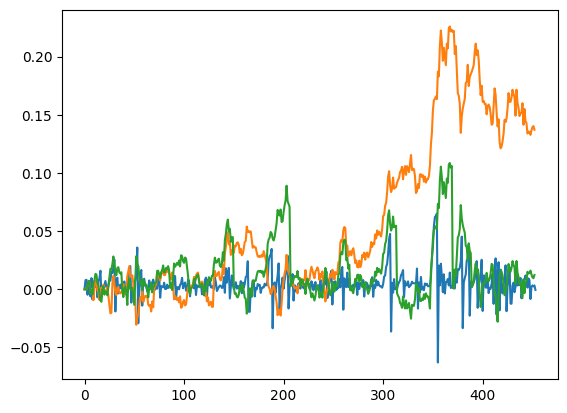

In [262]:
plt.plot(arima_testing_results["excess_return"], label="ARIMA")
plt.plot(erma_testing_results["excess_return"], label="EWMA")
plt.plot(macd_testing_results["excess_return"], label="MACD")